In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# grhpviz
from sklearn.tree import export_graphviz

import graphviz


# 기계 학습 모델 필요 모듈
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 구성

In [2]:
df_raw = pd.read_csv("Data/유방암.csv", encoding="cp949")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [3]:
# 목표변수값 0과 1로 만들기
df_raw["diagnosis"] = np.where(df_raw['diagnosis']== "양성", 1, 0)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis=1, inplace = False)

In [5]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [7]:
# train_test_split 6:4로 트레인과 테스트 데이터가 나눠진다.)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.4, random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (192, 30)
train data Y size: (192,)
test data X size: (128, 30)
test data Y size: (128,)


In [8]:
tree_uncustomized = RandomForestClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

#test데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.922


- 트레이닝 데이터에 대해 과적합이 되어있다. 따라서 이를 하이퍼 파라미터 튜닝을 통해 조절해줘야 한다.

## 2. 하이퍼 파리미터 튜닝

- 하이퍼 파라미터 튜닝을 할 때 어떤 파라미터를 먼저 하느냐에 따라서 값이 달라질 수가 있다.


- n_estimator
- max_depth
- n_samples_leaf
- n_samples_split

### n_estimators

In [9]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 16)] # 10 ~ 150

for v_n_estimators in para_n_tree:
    tree = RandomForestClassifier(random_state=1234, n_estimators = v_n_estimators)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainScore"] = train_score
df_accuracy_n["TestScore"] = test_score

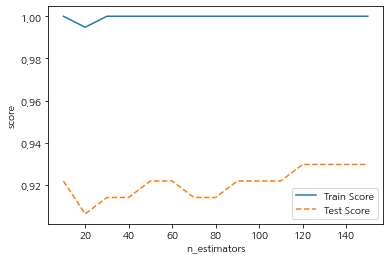

In [10]:
plt.plot(para_n_tree, train_score, linestyle="-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label = "Test Score")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend()

In [11]:
df_accuracy_n.round(3)

# Train과 Test Score의 Gap이 크다면 모델이 불안정한 것으로 볼 수 있다.

,n_estimators,TrainScore,TestScore
0,10,1.000,0.922
1,20,0.995,0.906
2,30,1.000,0.914
3,40,1.000,0.914
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.922


※ n_estimator는 120으로 선정한다.

### MaxDepth

In [25]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 10)]

for v_max_depth in para_depth:
    tree = RandomForestClassifier(random_state=1234, n_estimators=120, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["MaxDepth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [26]:
df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.953,0.914
1,2,0.979,0.906
2,3,0.990,0.906
3,4,1.000,0.922
4,5,1.000,0.930
5,6,1.000,0.930
6,7,1.000,0.930
7,8,1.000,0.930
8,9,1.000,0.930


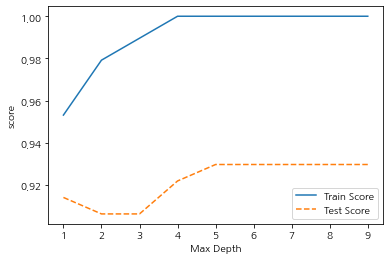

In [27]:
plt.plot(para_depth, train_score, linestyle="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle="--", label = "Test Score")
plt.xlabel("Max Depth")
plt.ylabel("score")
plt.legend()

※ maxdepth는 5으로 선정하겠다.

### min_samples_split

In [28]:
train_score = []; test_score = []

para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 120, max_depth=5, 
             min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [29]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.995,0.914
1,20,0.984,0.914
2,30,0.984,0.914
3,40,0.984,0.906
4,50,0.990,0.906
5,60,0.964,0.883
6,70,0.953,0.891
7,80,0.953,0.914
8,90,0.953,0.914
9,100,0.953,0.914


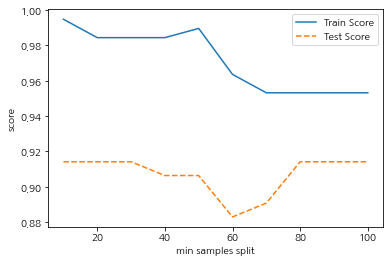

In [30]:
plt.plot(para_split, train_score, linestyle="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle="--", label = "Test Score")
plt.xlabel("min samples split")
plt.ylabel("score")
plt.legend()

※ min_samples split은 80으로 정했다.

In [31]:
train_score = []; test_score = []
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 120, max_depth=5, 
             min_samples_split=80, min_samples_leaf= v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [32]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.953,0.914
1,20,0.953,0.914
2,30,0.953,0.914
3,40,0.953,0.906
4,50,0.964,0.906
5,60,0.948,0.930
6,70,0.599,0.758
7,80,0.599,0.758
8,90,0.599,0.758
9,100,0.599,0.758


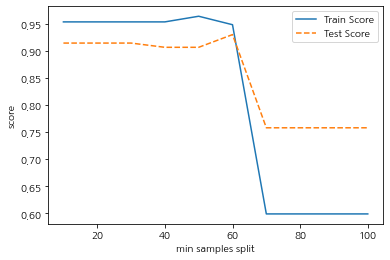

In [33]:
plt.plot(para_leaf, train_score, linestyle="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label = "Test Score")
plt.xlabel("min samples split")
plt.ylabel("score")
plt.legend()

※ min_samples_leaf는 60으로 정한다.

### 하이퍼 파라미터 튜닝 결과
- n_estimator: 120
- 최대 깊이: 5
- min_sampled_split: 80
- min_samples_leaf:60

In [40]:
rf_final = RandomForestClassifier(random_state=1234, n_estimators = 120, max_depth=5, 
             min_samples_split=80, min_samples_leaf=60)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

# Train 데이터 설명력
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
#test데이터 설명력
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))


Accuracy on training set: 0.948
Accuracy on test set: 0.930


In [41]:
print("Accuracy:{0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy:0.930

Confusion Matrix: 
[[90  7]
 [ 2 29]]


- 트레이닝 셋의 과적합을 낮출 수 있었고, 또한 92.2%던 테스트 정확도도 93%로 올릴 수 있다.

In [35]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
22,worst_perimeter,0.182
6,mean_concavity,0.169
27,worst_concave_points,0.130
7,mean_concave_points,0.091
20,worst_radius,0.091
2,mean_perimeter,0.078
23,worst_area,0.078
3,mean_area,0.052
0,mean_radius,0.026
17,concave_points_error,0.026


Text(0, 0.5, '변수')

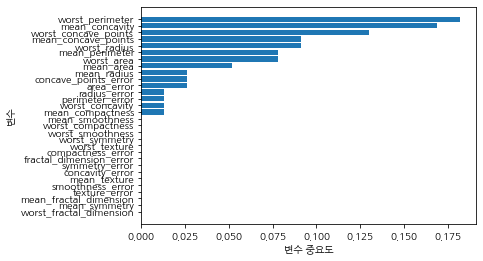

In [36]:
df_importance.sort_values("Importance", ascending= True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

#### 중요 설명변수 
- worst_perimeter	0.182
- mean_concavity	0.169
- worst_concave_points	0.130
- mean_concave_points	0.091
- worst_radius	0.091
- mean_perimeter	0.078
- worst_area	0.078


- 상위 3개의 주요변수를 보면 동일한 데이터를 의사결정나무에서 확인했을 때와는 많이 달라졌다. 특히 worst_perimeter((세포)최대둘레), mean_concavity((세포)평균 오목함) 변수가 추가되었음을 확인할 수 있다.
- 하지만 상위 7개의 설명변수를 보면 이전에 나왔던 주요 변수가 같이 나오는 것을 확인할 수 있다.
- 따라서 해당 3변수(worst_conacve_points, worst_area, worst_radius)를 포함된 7가지의 변수를 확인해서 유방암의 양성과 음성을 분류하는 설명변수로 사용해도 될 것으로 보인다.